In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import  utils

In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [26]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
# нормализация данных
x_train = x_train / 255
x_test = x_test / 255

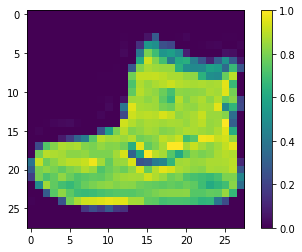

In [29]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

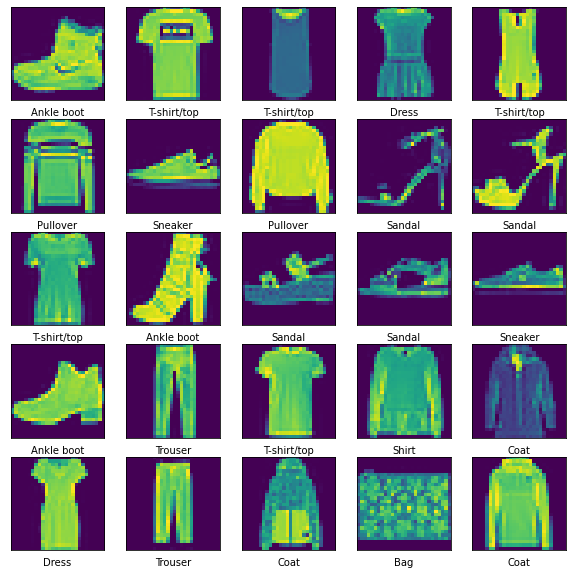

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

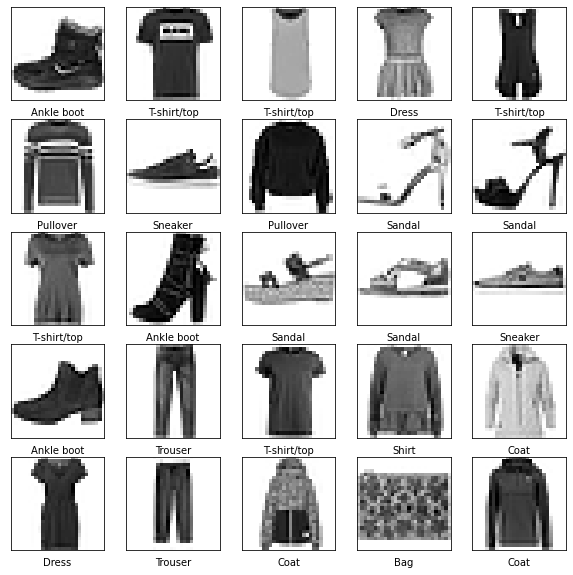

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [35]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"), # 128 потому что показала себя хорошо в историческом плане
    Dense(10, activation="softmax") # 10 потому что на выходе у нас 10 классов
])

In [36]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(x_train, y_train, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3183 - accuracy: 0.8867
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3150 - accuracy: 0.8895
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3111 - accuracy: 0.8900
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3068 - accuracy: 0.8911
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3043 - accuracy: 0.8921
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3015 - accuracy: 0.8932
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2978 - accuracy: 0.8935
Epoch 8/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2952 - accuracy: 0.8960
Epoch 9/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2911 - accuracy: 0.8963
Epoch 10/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.288

In [41]:
# проверка точности предсказания

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'test accuracy : {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8860
test accuracy : 0.8859999775886536


In [42]:
# предсказываем

predictions = model.predict(x_train)
predictions[0]

1875/1875 [==============================] - 2s 802us/step


array([2.1609032e-09, 4.5974134e-11, 5.6096167e-10, 1.8678625e-10,
       1.2357567e-11, 1.2068378e-04, 2.3685893e-09, 7.3512347e-04,
       6.9943759e-08, 9.9914408e-01], dtype=float32)

In [43]:
np.argmax(predictions[0]) # ищем максимальное значение - максимальный индекс

9

In [44]:
y_train[0]

9

In [45]:
class_names[np.argmax(predictions[0])]

'Ankle boot'